https://www.kaggle.com/gilsousa/prediction-iris-dataset

In [1]:
# Load libraries
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import scipy
import seaborn as sns
import sklearn
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sys

print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.14 (default, Mar 22 2018, 14:43:05) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
Scipy: 1.0.1
Numpy: 1.14.3
Pandas: 0.22.0
Matplotlib: 2.2.2
sklearn: 0.19.1


/Users/kcclaws/.virtualenvs/analytics/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
print data.head()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
print data.shape

(150, 6)


In [5]:
print data.shape[0]

150


In [6]:
print data.describe()

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [14]:
# drop Id column from dataset
data = data.drop('Id', axis=1)

In [15]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizing the data

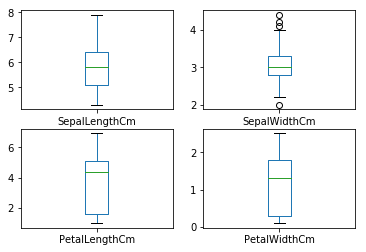

In [16]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

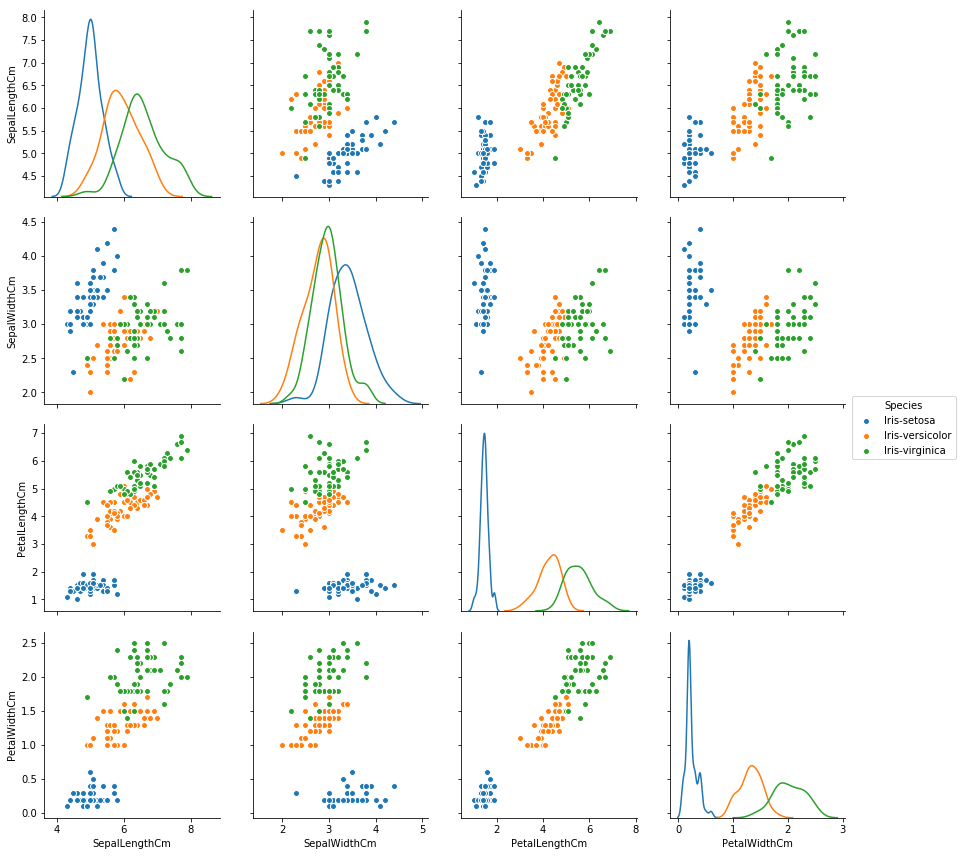

In [17]:
sns.pairplot(data,hue='Species',size=3,diag_kind='kde')
plt.show()

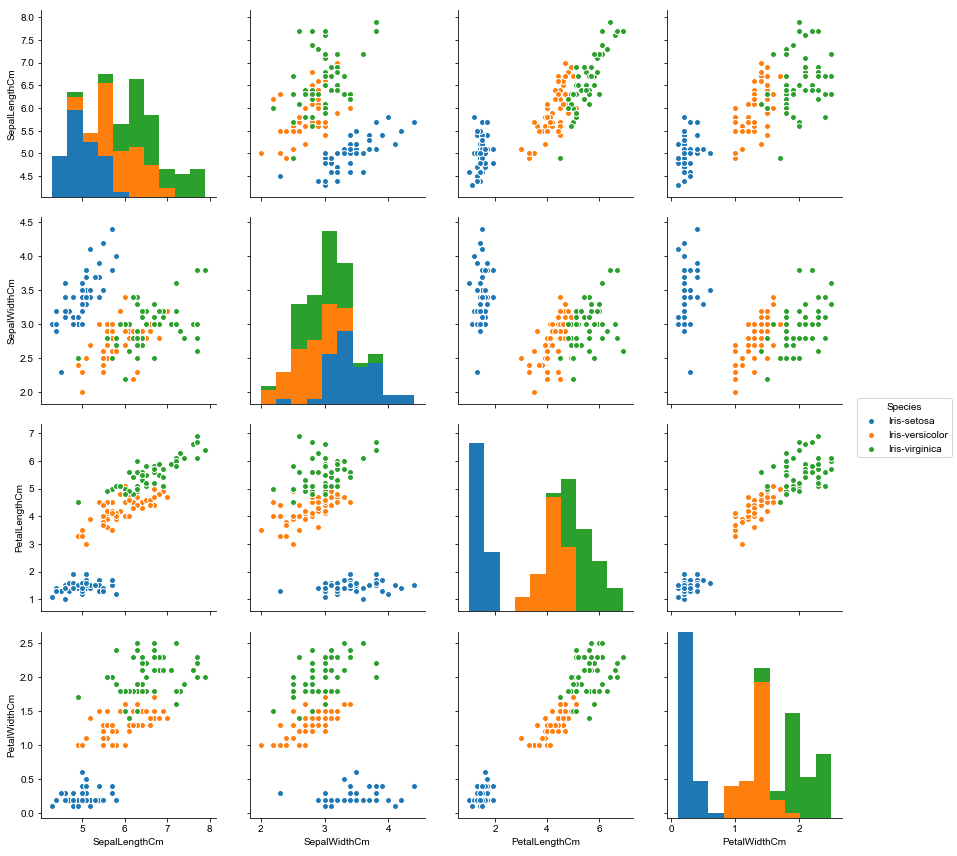

In [18]:
sns.pairplot(data,hue='Species', size=3)
sns.set()

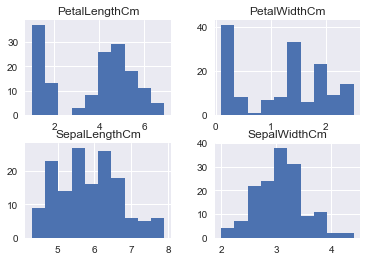

In [20]:
data.hist()
plt.show()

# Machine learning

In [28]:
# Get validaiton dataset
array = data.values

X = array[:,0:4]
y = array[:,4]

validation_size = 0.20
seed = 7
X_train,X_validation,y_train, y_validation = cross_validation.train_test_split(X,y,
                                                                             test_size = validation_size,
                                                                             random_state = seed)

In [29]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [30]:
# Get tuples of a bunch of different models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = cross_validation.KFold(n=num_instances,
                                  n_folds = num_folds,
                                  random_state = seed)
    cv_results = cross_validation.cross_val_score(model,X_train,
                                                 y_train,
                                                 cv = kfold,
                                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [ ]:
# Compare algorithms visually